# Import Stuff

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from scipy.linalg import hankel

import time

from embedding import create_embedding
from svd import find_eig

from projection import project_onto_signal_subspace
from projection_with_UUT import project_onto_signal_subspace_with_UUT

from threshold import find_threshold
from threshold_with_UUT import find_threshold_with_UUT

from plot import plot_stuff

# Lists for doing stuff

In [2]:
HTime = np.zeros(4)
HTime_cnt = 0

alarm_count = np.zeros(5)
alarm_cnt = 0

# Scenario DA1

In [3]:
X = np.asarray(pd.read_csv('../Dataset/TE/1-Scenario DA1/xmv10_359_data_1.csv', usecols=[0], header=None))

In [4]:
print(X)
print(X.shape)
print(max(X), min(X))

[[0.26534]
 [0.26289]
 [0.26723]
 ...
 [0.237  ]
 [0.23558]
 [0.23411]]
(4801, 1)
[0.32367] [0.23411]


In [5]:
X_train = X[:2000]
X_test = X[1750:]

In [6]:
print(X_train.shape, X_test.shape)

(2000, 1) (3051, 1)


In [7]:
X_train_initial = X_train[:500]
X_train_theta = X_train[250:]

In [8]:
start = time.time()

In [9]:
X_train_new, L = create_embedding(X_train_initial)

In [10]:
eigenValues, eigenVectors = find_eig(X_train_new)

### Plot after removing the 1st EigenValue

Text(0.5, 1.02, 'Scree Plot')

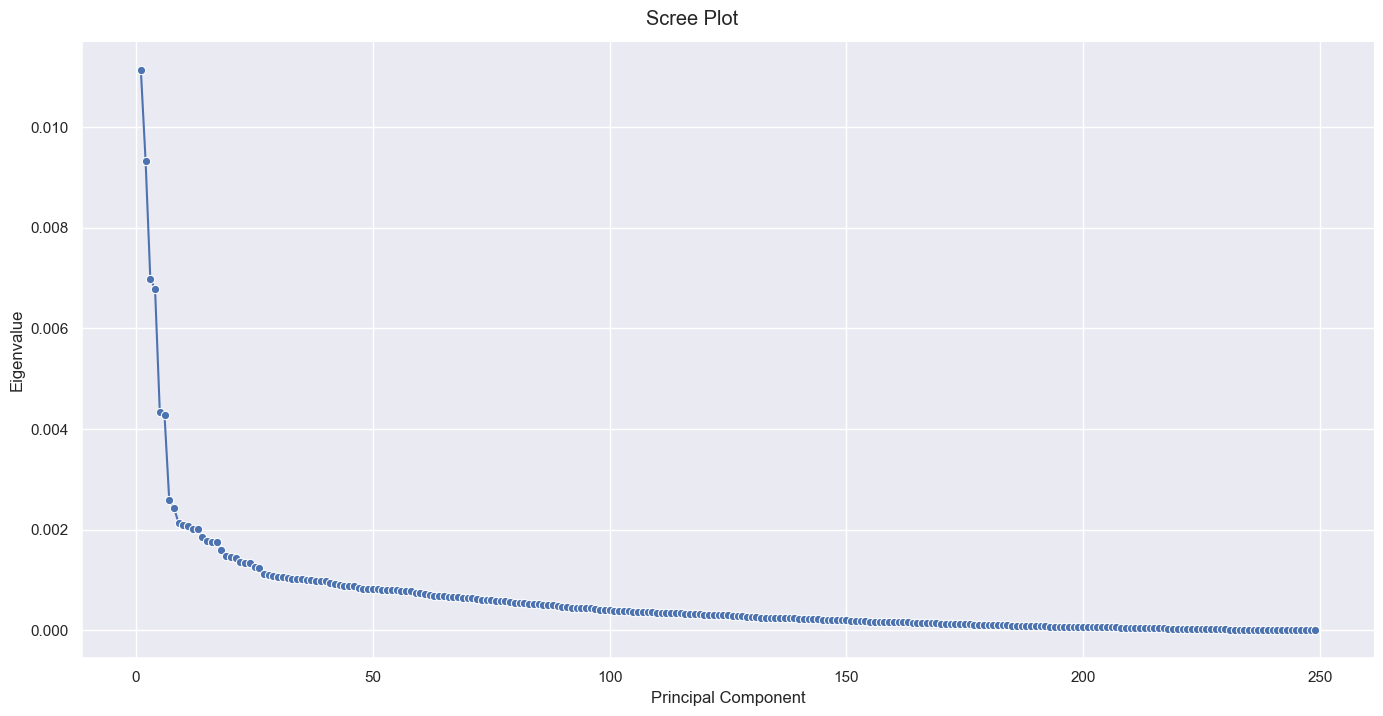

In [11]:
temp_df = pd.DataFrame({
    'Principal Component': range(1, len(eigenValues)),
    'Eigenvalue': eigenValues[1:]
})

sns.set_theme()

plot = sns.relplot(data=temp_df, x='Principal Component', y='Eigenvalue', kind='line', marker='o', height=7, aspect=2)

plot.set_axis_labels("Principal Component", "Eigenvalue")
plot.figure.suptitle("Scree Plot", y=1.02)

### Using our criteria of maximum consecutive difference

In [12]:
diff = np.diff(eigenValues[1:])

elbow_index = np.argmin(diff) + 1

print(f"The elbow is at component {elbow_index}")
print(f"The value of r: {elbow_index + 1}")

The elbow is at component 4
The value of r: 5


In [13]:
r = elbow_index + 1

In [14]:
centroid, pX, U, X_train_extracted_data = project_onto_signal_subspace(X_train_new, eigenVectors, r)

In [15]:
dtest_theta, dtrain_scores, dtest_scores = find_threshold(X_train_initial, X_train_theta, U, centroid, L)

In [16]:
print(dtest_theta)

0.041317665754424214


In [17]:
Xj = hankel(X_test[:L], X_test[L-1:])
UT = U.T
pXj = np.matmul(UT, Xj)
dj_matrix = centroid - pXj
dj_scores = np.linalg.norm(dj_matrix, axis=0, ord=2)
dj_scores = np.asarray(dj_scores)
np.max(dj_scores)

np.float64(0.498054528856156)

(2, 2) (2, 2) (1, 1)


c:\Users\Himanshu Shekhar\Desktop\College\3rd Year\Sem 5\CS658\Assignments\PASAD\Implementation\plot.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(xlables)
c:\Users\Himanshu Shekhar\Desktop\College\3rd Year\Sem 5\CS658\Assignments\PASAD\Implementation\plot.py:52: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(xlables)


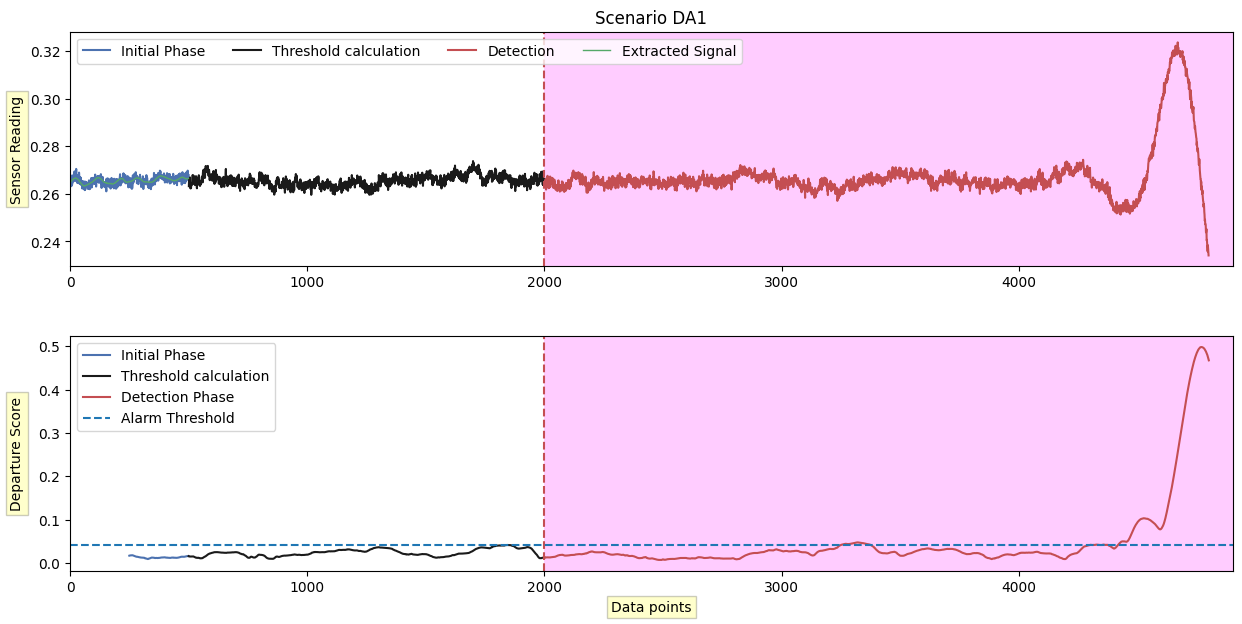

In [18]:
plot_stuff(1, X, X_train_extracted_data, dtrain_scores, dtest_scores, dj_scores, dtest_theta, L, "Scenario DA1")

In [19]:
end = time.time()

print(f"Time taken with P = UT is: {end - start:.4f}s")

HTime[HTime_cnt] = end - start
HTime_cnt = HTime_cnt + 1

Time taken with P = UUT is: 0.8756s


In [20]:
alarm_count[alarm_cnt] = np.sum(dj_scores > dtest_theta)
alarm_cnt = alarm_cnt + 1

In [21]:
alarm_count[0]

np.float64(570.0)

# Scenario DA2

In [22]:
X = np.asarray(pd.read_csv('../Dataset/TE/2-Scenario DA2/xmeas7_zero_data_1.csv', usecols=[0], header=None))

In [23]:
print(X)
print(X.shape)
print(max(X), min(X))

[[0.26534]
 [0.26581]
 [0.26398]
 ...
 [0.20627]
 [0.20554]
 [0.20368]]
(4801, 1)
[0.27389] [0.16744]


### Plot after removing the 1st EigenValue

Text(0.5, 1.02, 'Scree Plot')

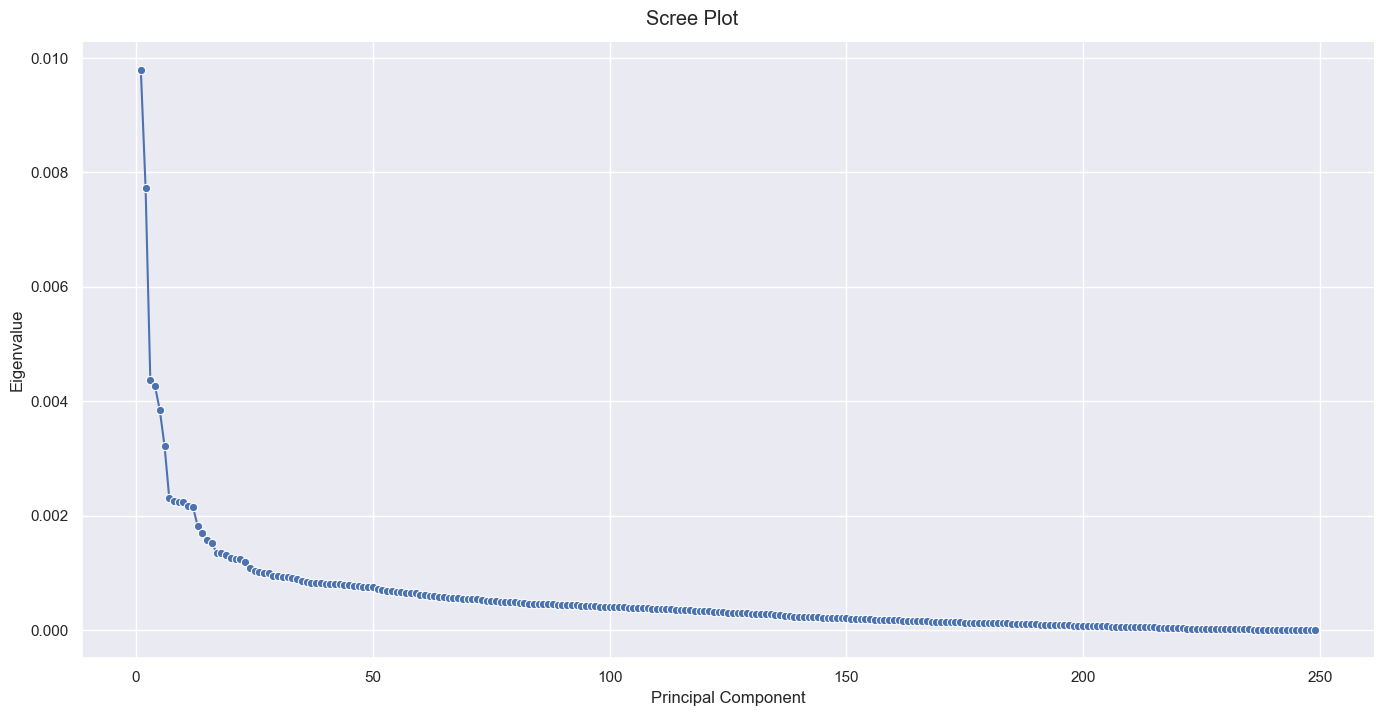

In [24]:
X_train = X[:2000]
X_test = X[1750:]

X_train_initial = X_train[:500]
X_train_theta = X_train[250:]

# Step 1
X_train_new, L = create_embedding(X_train_initial)

# Step 2
eigenValues, eigenVectors = find_eig(X_train_new)

# Scree Plot
temp_df = pd.DataFrame({
    'Principal Component': range(1, len(eigenValues)),
    'Eigenvalue': eigenValues[1:]
})

sns.set_theme()

plot = sns.relplot(data=temp_df, x='Principal Component', y='Eigenvalue', kind='line', marker='o', height=7, aspect=2)

plot.set_axis_labels("Principal Component", "Eigenvalue")
plot.figure.suptitle("Scree Plot", y=1.02)

### Using our criteria of maximum consecutive difference

In [25]:
diff = np.diff(eigenValues[1:])

elbow_index = np.argmin(diff) + 1

print(f"The elbow is at component {elbow_index}")
print(f"The value of r: {elbow_index + 1}")

The elbow is at component 2
The value of r: 3


0.06242263896977938
(2, 2) (2, 2) (1, 1)


c:\Users\Himanshu Shekhar\Desktop\College\3rd Year\Sem 5\CS658\Assignments\PASAD\Implementation\plot.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(xlables)
c:\Users\Himanshu Shekhar\Desktop\College\3rd Year\Sem 5\CS658\Assignments\PASAD\Implementation\plot.py:52: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(xlables)


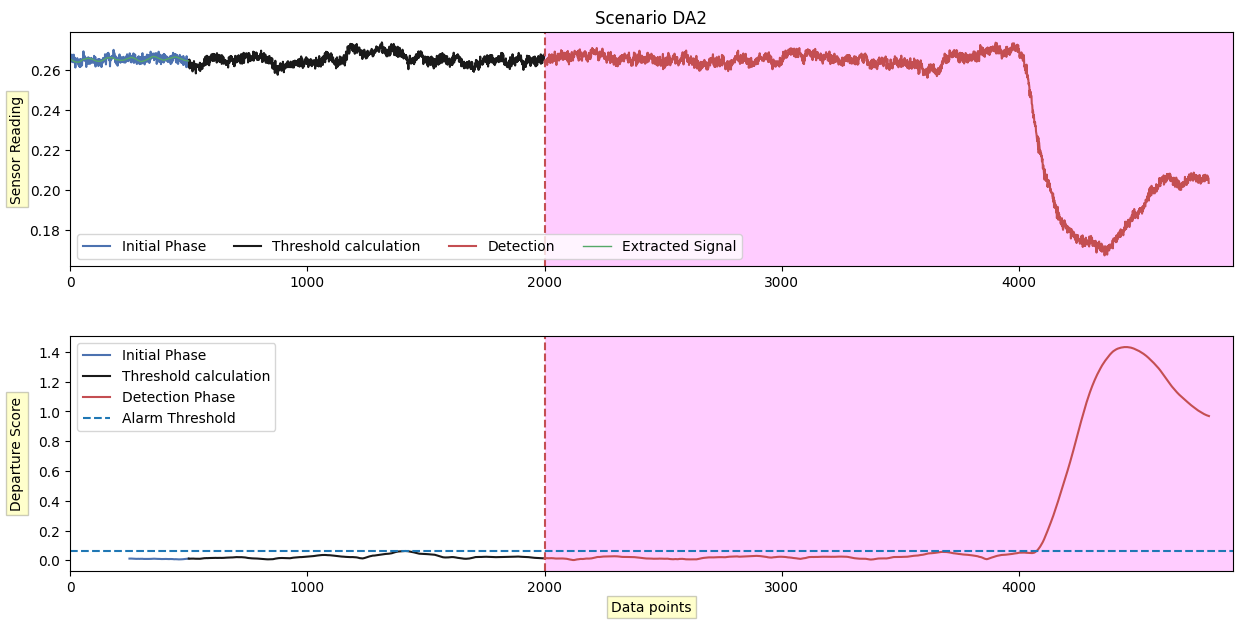

In [26]:
r = elbow_index + 1

# Step 3
centroid, pX, U, X_train_extracted_data = project_onto_signal_subspace(X_train_new, eigenVectors, r)

# Step 4
dtest_theta, dtrain_scores, dtest_scores = find_threshold(X_train_initial, X_train_theta, U, centroid, L)

print(dtest_theta)

Xj = hankel(X_test[:L], X_test[L-1:])
UT = U.T
pXj = np.matmul(UT, Xj)
dj_matrix = centroid - pXj
dj_scores = np.linalg.norm(dj_matrix, axis=0, ord=2)
dj_scores = np.asarray(dj_scores)
np.max(dj_scores)

plot_stuff(1, X, X_train_extracted_data, dtrain_scores, dtest_scores, dj_scores, dtest_theta, L, "Scenario DA2")

In [27]:
alarm_count[alarm_cnt] = np.sum(dj_scores > dtest_theta)
alarm_cnt = alarm_cnt + 1

# Scenario SA1

In [28]:
X = np.asarray(pd.read_csv('../Dataset/TE/3-Scenario SA1/xmv9_hundred_data_1.csv', usecols=[0], header=None))

In [29]:
print(X)
print(X.shape)
print(max(X), min(X))

[[0.26534]
 [0.26433]
 [0.26234]
 ...
 [0.25584]
 [0.25701]
 [0.2549 ]]
(4801, 1)
[0.28186] [0.25015]


### Plot after removing the 1st EigenValue

Text(0.5, 1.02, 'Scree Plot')

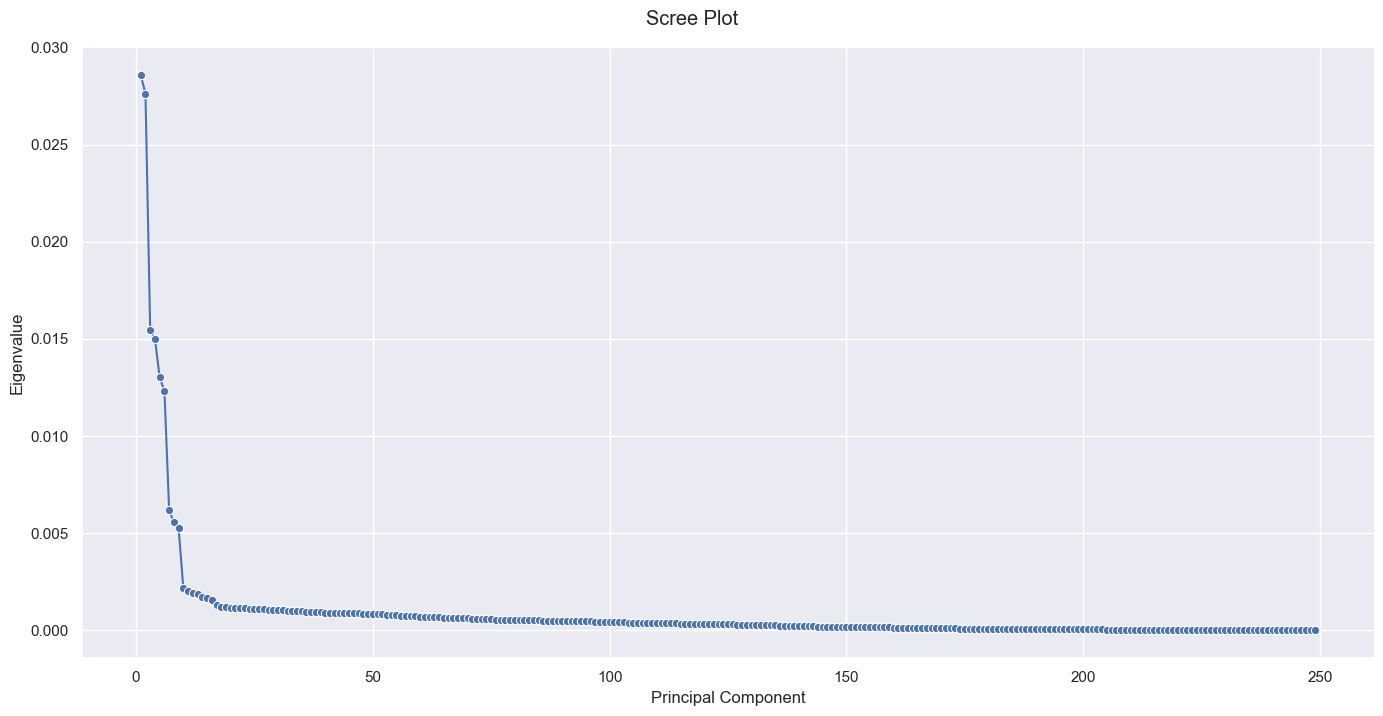

In [30]:
X_train = X[:2000]
X_test = X[1750:]

X_train_initial = X_train[:500]
X_train_theta = X_train[250:]

# Step 1
X_train_new, L = create_embedding(X_train_initial)

# Step 2
eigenValues, eigenVectors = find_eig(X_train_new)

# Scree Plot
temp_df = pd.DataFrame({
    'Principal Component': range(1, len(eigenValues)),
    'Eigenvalue': eigenValues[1:]
})

sns.set_theme()

plot = sns.relplot(data=temp_df, x='Principal Component', y='Eigenvalue', kind='line', marker='o', height=7, aspect=2)

plot.set_axis_labels("Principal Component", "Eigenvalue")
plot.figure.suptitle("Scree Plot", y=1.02)

### Using our criteria of maximum consecutive difference

In [31]:
diff = np.diff(eigenValues[1:])

elbow_index = np.argmin(diff) + 1

print(f"The elbow is at component {elbow_index}")
print(f"The value of r: {elbow_index + 1}")

The elbow is at component 2
The value of r: 3


0.04684351083012187
(2, 2) (2, 2) (1, 1)


c:\Users\Himanshu Shekhar\Desktop\College\3rd Year\Sem 5\CS658\Assignments\PASAD\Implementation\plot.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(xlables)
c:\Users\Himanshu Shekhar\Desktop\College\3rd Year\Sem 5\CS658\Assignments\PASAD\Implementation\plot.py:52: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(xlables)


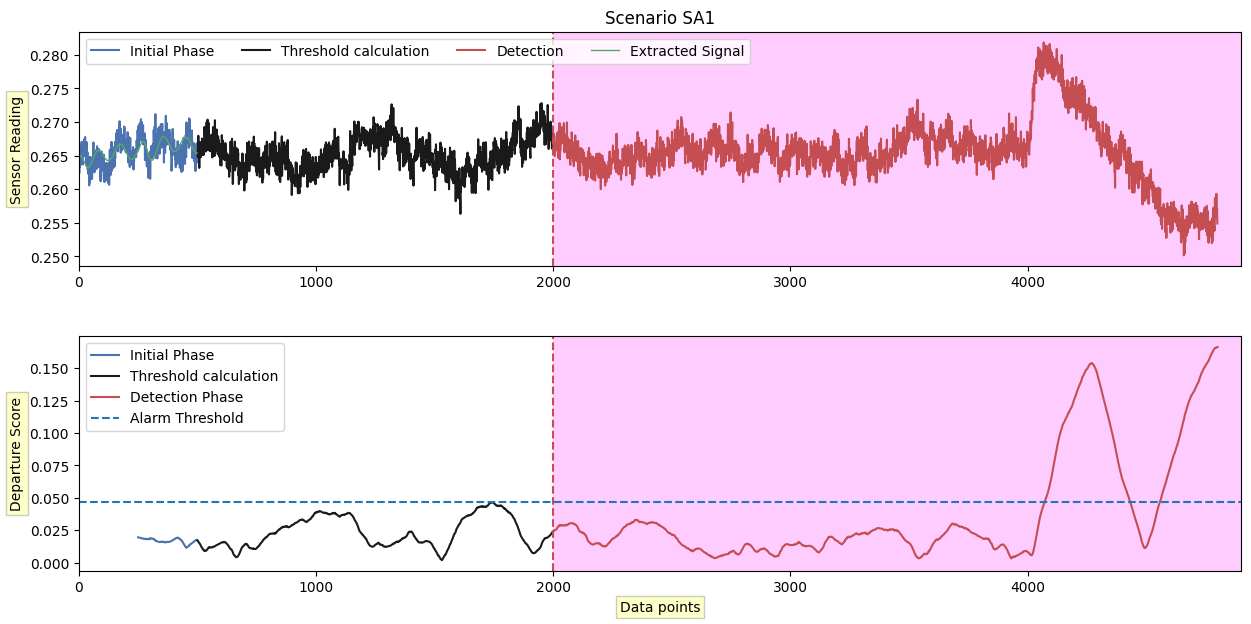

In [32]:
r = elbow_index + 1

# Step 3
centroid, pX, U, X_train_extracted_data = project_onto_signal_subspace(X_train_new, eigenVectors, r)

# Step 4
dtest_theta, dtrain_scores, dtest_scores = find_threshold(X_train_initial, X_train_theta, U, centroid, L)

print(dtest_theta)

Xj = hankel(X_test[:L], X_test[L-1:])
UT = U.T
pXj = np.matmul(UT, Xj)
dj_matrix = centroid - pXj
dj_scores = np.linalg.norm(dj_matrix, axis=0, ord=2)
dj_scores = np.asarray(dj_scores)
np.max(dj_scores)

plot_stuff(1, X, X_train_extracted_data, dtrain_scores, dtest_scores, dj_scores, dtest_theta, L, "Scenario SA1")

In [33]:
alarm_count[alarm_cnt] = np.sum(dj_scores > dtest_theta)
alarm_cnt = alarm_cnt + 1

# Scenario SA2

In [34]:
X = np.asarray(pd.read_csv('../Dataset/TE/4-Scenario SA2/xmv6_twentyeight_data_1.csv', usecols=[0], header=None))

In [35]:
print(X)
print(f"Shape of X: {X.shape}")
print(f"Maximum value: {max(X)}, Minimum value: {min(X)}")

[[0.26534]
 [0.26446]
 [0.26721]
 ...
 [0.27098]
 [0.27159]
 [0.26984]]
Shape of X: (4801, 1)
Maximum value: [0.28035], Minimum value: [0.25671]


### Plot after removing the 1st EigenValue

Text(0.5, 1.02, 'Scree Plot')

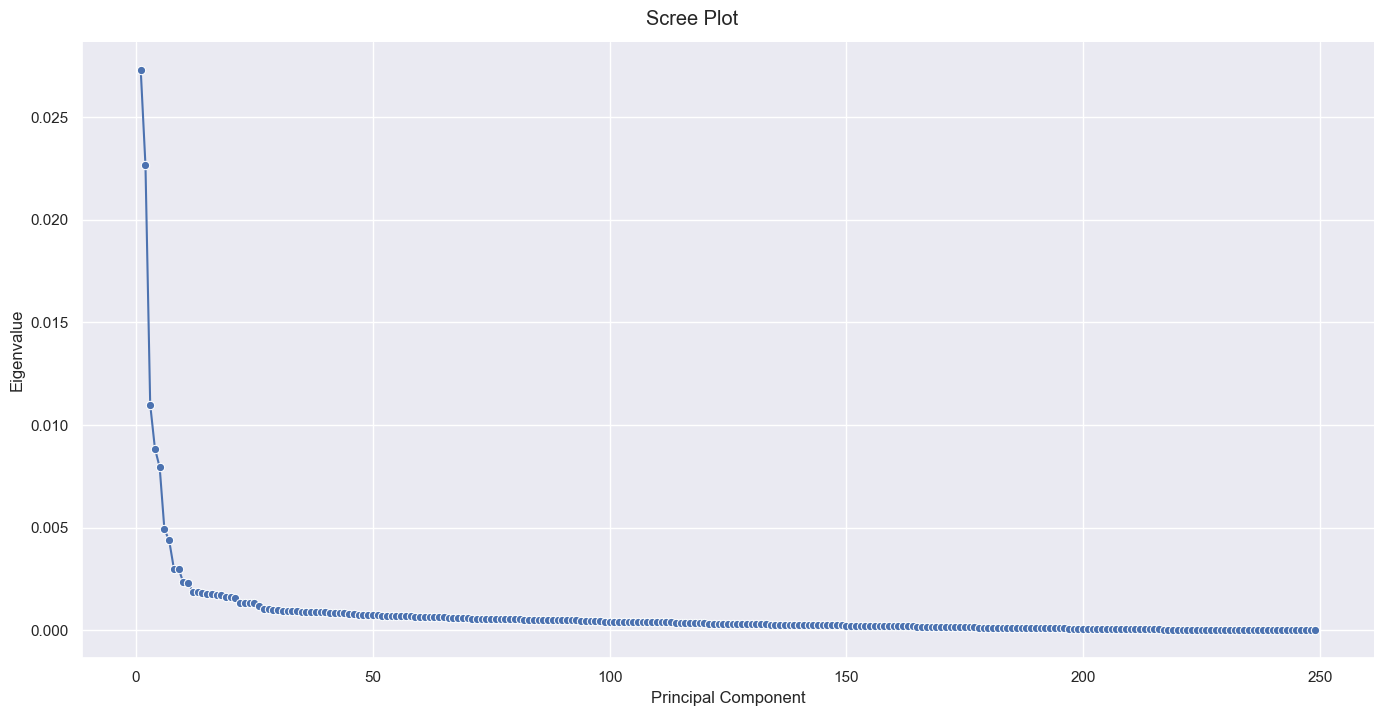

In [36]:
X_train = X[:2000]
X_test = X[1750:]

X_train_initial = X_train[:500]
X_train_theta = X_train[250:]

# Step 1
X_train_new, L = create_embedding(X_train_initial)

# Step 2
eigenValues, eigenVectors = find_eig(X_train_new)

# Scree Plot
temp_df = pd.DataFrame({
    'Principal Component': range(1, len(eigenValues)),
    'Eigenvalue': eigenValues[1:]
})

sns.set_theme()

plot = sns.relplot(data=temp_df, x='Principal Component', y='Eigenvalue', kind='line', marker='o', height=7, aspect=2)

plot.set_axis_labels("Principal Component", "Eigenvalue")
plot.figure.suptitle("Scree Plot", y=1.02)

### Using our criteria of maximum consecutive difference

In [37]:
diff = np.diff(eigenValues[1:])

elbow_index = np.argmin(diff) + 1

print(f"The elbow is at component {elbow_index}")
print(f"The value of r: {elbow_index + 1}")

The elbow is at component 2
The value of r: 3


0.047040940181675615
(2, 2) (2, 2) (1, 1)


c:\Users\Himanshu Shekhar\Desktop\College\3rd Year\Sem 5\CS658\Assignments\PASAD\Implementation\plot.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(xlables)
c:\Users\Himanshu Shekhar\Desktop\College\3rd Year\Sem 5\CS658\Assignments\PASAD\Implementation\plot.py:52: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(xlables)


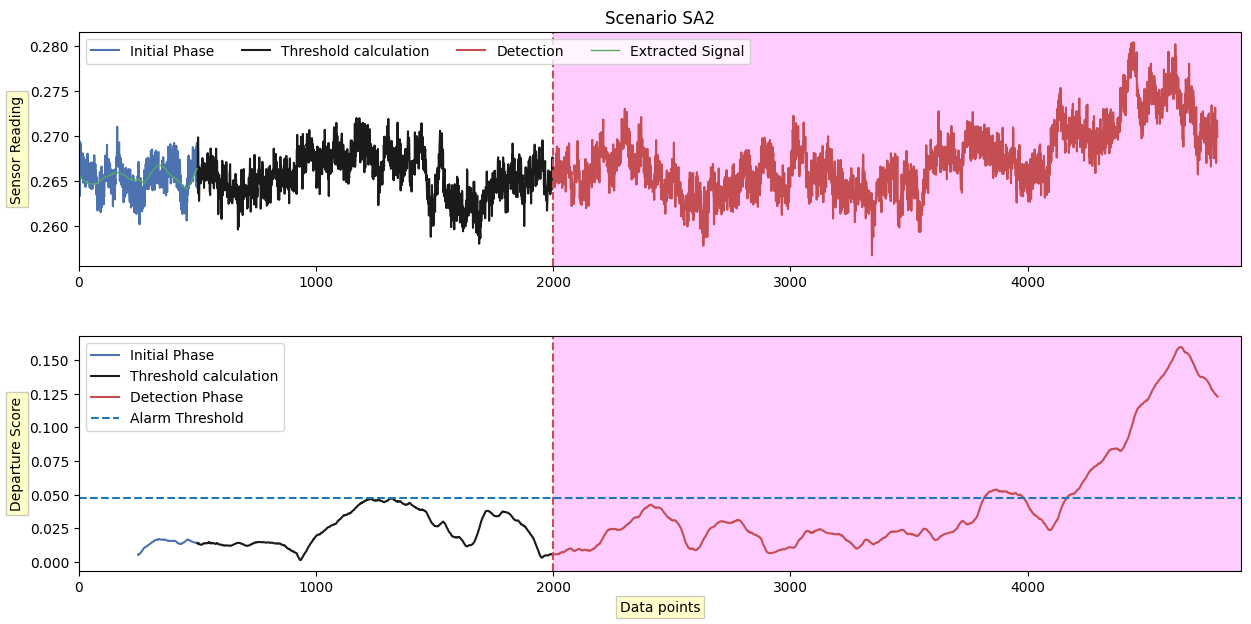

In [38]:
r = elbow_index + 1

# Step 3
centroid, pX, U, X_train_extracted_data = project_onto_signal_subspace(X_train_new, eigenVectors, r)

# Step 4
dtest_theta, dtrain_scores, dtest_scores = find_threshold(X_train_initial, X_train_theta, U, centroid, L)

print(dtest_theta)

Xj = hankel(X_test[:L], X_test[L-1:])
UT = U.T
pXj = np.matmul(UT, Xj)
dj_matrix = centroid - pXj
dj_scores = np.linalg.norm(dj_matrix, axis=0, ord=2)
dj_scores = np.asarray(dj_scores)
np.max(dj_scores)

plot_stuff(1, X, X_train_extracted_data, dtrain_scores, dtest_scores, dj_scores, dtest_theta, L, "Scenario SA2")

In [39]:
alarm_count[alarm_cnt] = np.sum(dj_scores > dtest_theta)
alarm_cnt = alarm_cnt + 1

# Scenario SA3

In [40]:
X = np.asarray(pd.read_csv('../Dataset/TE/5-Scenario SA3/xmeas10_001_data_1.csv', usecols=[0], header=None))

In [41]:
print(X)
print(f"Shape of X: {X.shape}")
print(f"Maximum value: {max(X)}, Minimum value: {min(X)}")

[[0.26534]
 [0.26528]
 [0.26392]
 ...
 [0.23791]
 [0.23944]
 [0.23785]]
Shape of X: (4801, 1)
Maximum value: [0.354], Minimum value: [0.23733]


### Plot after removing the 1st EigenValue

Text(0.5, 1.02, 'Scree Plot')

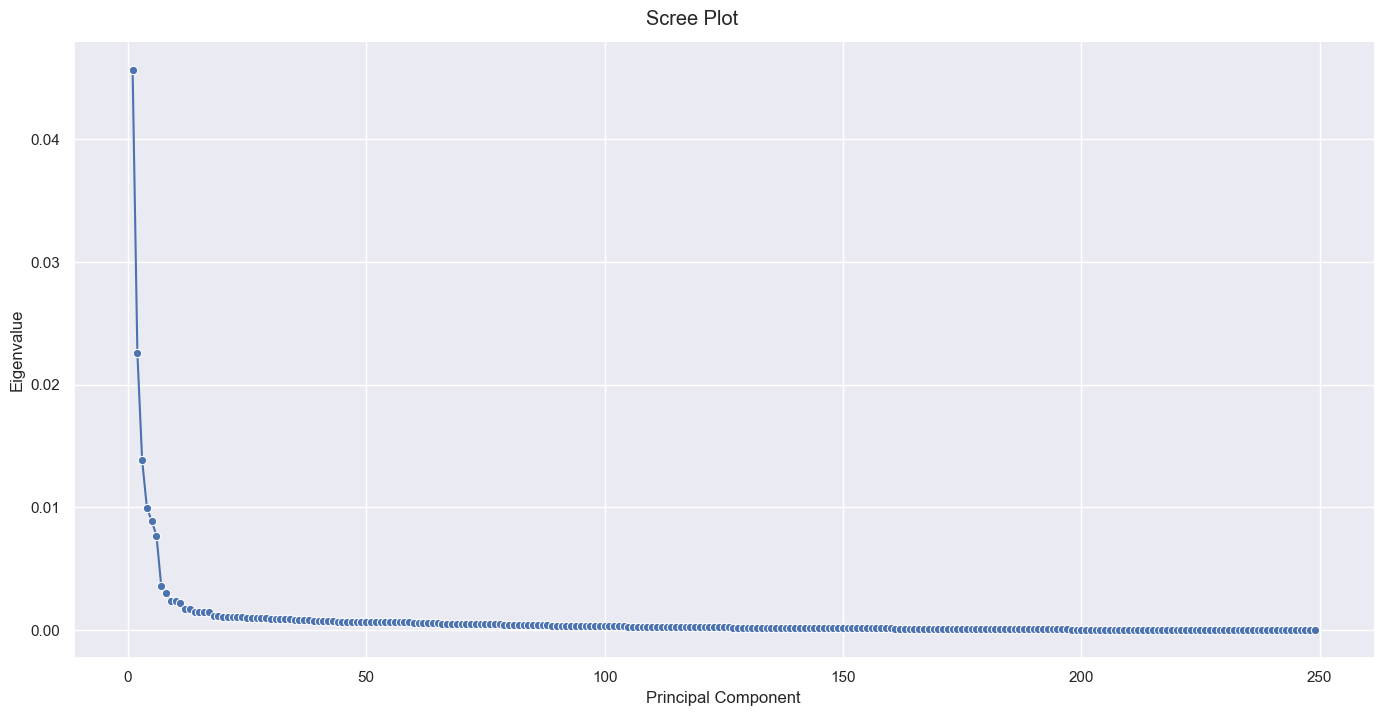

In [42]:
X_train = X[:2000]
X_test = X[1750:]

X_train_initial = X_train[:500]
X_train_theta = X_train[250:]

# Step 1
X_train_new, L = create_embedding(X_train_initial)

# Step 2
eigenValues, eigenVectors = find_eig(X_train_new)

# Scree Plot
temp_df = pd.DataFrame({
    'Principal Component': range(1, len(eigenValues)),
    'Eigenvalue': eigenValues[1:]
})

sns.set_theme()

plot = sns.relplot(data=temp_df, x='Principal Component', y='Eigenvalue', kind='line', marker='o', height=7, aspect=2)

plot.set_axis_labels("Principal Component", "Eigenvalue")
plot.figure.suptitle("Scree Plot", y=1.02)

### Using our criteria of maximum consecutive difference

In [43]:
diff = np.diff(eigenValues[1:])

elbow_index = np.argmin(diff) + 1

print(f"The elbow is at component {elbow_index}")
print(f"The value of r: {elbow_index + 1}")

The elbow is at component 1
The value of r: 2


0.045315248036012674
(2, 2) (2, 2) (1, 1)


c:\Users\Himanshu Shekhar\Desktop\College\3rd Year\Sem 5\CS658\Assignments\PASAD\Implementation\plot.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(xlables)
c:\Users\Himanshu Shekhar\Desktop\College\3rd Year\Sem 5\CS658\Assignments\PASAD\Implementation\plot.py:52: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(xlables)


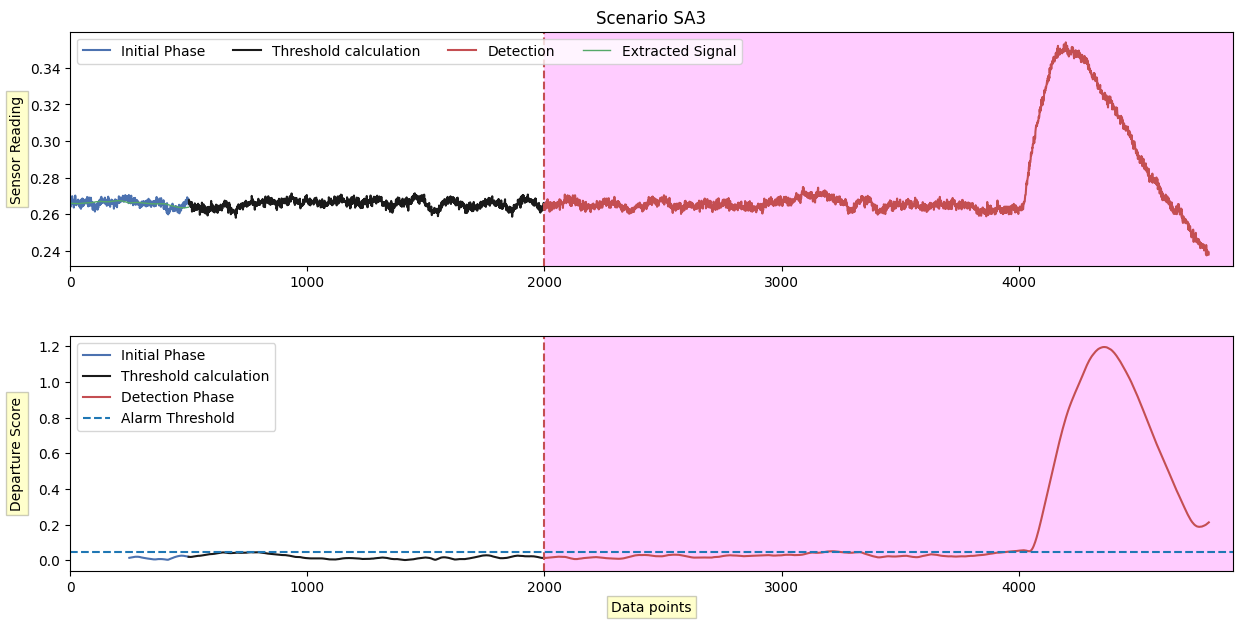

In [44]:
r = elbow_index + 1

# Step 3
centroid, pX, U, X_train_extracted_data = project_onto_signal_subspace(X_train_new, eigenVectors, r)

# Step 4
dtest_theta, dtrain_scores, dtest_scores = find_threshold(X_train_initial, X_train_theta, U, centroid, L)

print(dtest_theta)

Xj = hankel(X_test[:L], X_test[L-1:])
UT = U.T
pXj = np.matmul(UT, Xj)
dj_matrix = centroid - pXj
dj_scores = np.linalg.norm(dj_matrix, axis=0, ord=2)
dj_scores = np.asarray(dj_scores)
np.max(dj_scores)

plot_stuff(1, X, X_train_extracted_data, dtrain_scores, dtest_scores, dj_scores, dtest_theta, L, "Scenario SA3")

In [45]:
alarm_count[alarm_cnt] = np.sum(dj_scores > dtest_theta)
alarm_cnt = alarm_cnt + 1

# SWaT Dataset

In [46]:
X_train = pd.read_excel('../Dataset/SWaT/SWaT_Dataset_Normal_v0.xlsx', usecols=[19], header=None, engine='calamine')
X_test = pd.read_excel('../Dataset/SWaT/SWaT_Dataset_Attack_v0.xlsx', usecols=[19], header=None, engine='calamine')

In [47]:
X_train = X_train.drop(index=0).reset_index(drop=True)
X_test = X_test.drop(index=0).reset_index(drop=True)

In [48]:
X_train = np.asarray(X_train, dtype=np.float32)
X_test = np.asarray(X_test, dtype=np.float32)

In [49]:
print(X_train.shape, X_test.shape)

(496800, 1) (449919, 1)


In [50]:
X_train_copy = X_train[-200000:]

### Plot after removing the 1st EigenValue

Text(0.5, 1.02, 'Scree Plot')

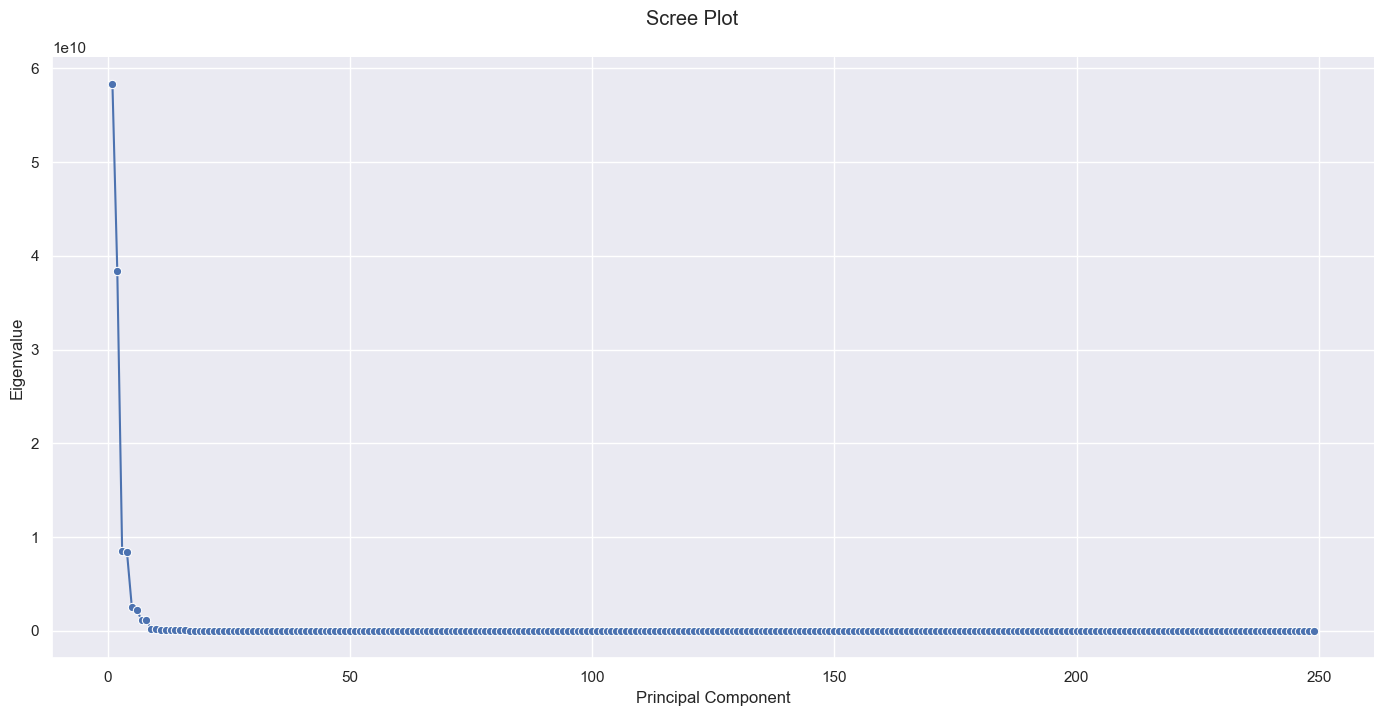

In [51]:
X_train_initial = X_train_copy[:10000]
X_train_theta = X_train_copy[7500:]

start = time.time()

# Step 1
X_train_new, L = create_embedding(X_train_initial)

# Step 2
eigenValues, eigenVectors = find_eig(X_train_new)

# Scree Plot
temp_df = pd.DataFrame({
    'Principal Component': range(1, 250),
    'Eigenvalue': eigenValues[1:250] # Value of r will not be very big so there is no point in plotting the trailing values
})

sns.set_theme()

plot = sns.relplot(data=temp_df, x='Principal Component', y='Eigenvalue', kind='line', marker='o', height=7, aspect=2)

plot.set_axis_labels("Principal Component", "Eigenvalue")
plot.figure.suptitle("Scree Plot", y=1.02)

In [52]:
X = np.concatenate((X_train_copy, X_test))

print(X)
print(f"Shape of X: {X.shape}")

[[939.9433]
 [940.1035]
 [939.9833]
 ...
 [974.2695]
 [974.2294]
 [974.4296]]
Shape of X: (649919, 1)


### Using our criteria of maximum consecutive difference

In [53]:
diff = np.diff(eigenValues[1:250])

elbow_index = np.argmin(diff) + 1

print(f"The elbow is at component {elbow_index}")
print(f"The value of r: {elbow_index + 1}")

The elbow is at component 2
The value of r: 3


Threshold value: 5481.096492451534


c:\Users\Himanshu Shekhar\Desktop\College\3rd Year\Sem 5\CS658\Assignments\PASAD\Implementation\plot.py:84: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(xlables)
c:\Users\Himanshu Shekhar\Desktop\College\3rd Year\Sem 5\CS658\Assignments\PASAD\Implementation\plot.py:107: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(xlables)


(2, 2) (2, 2) (1, 1)


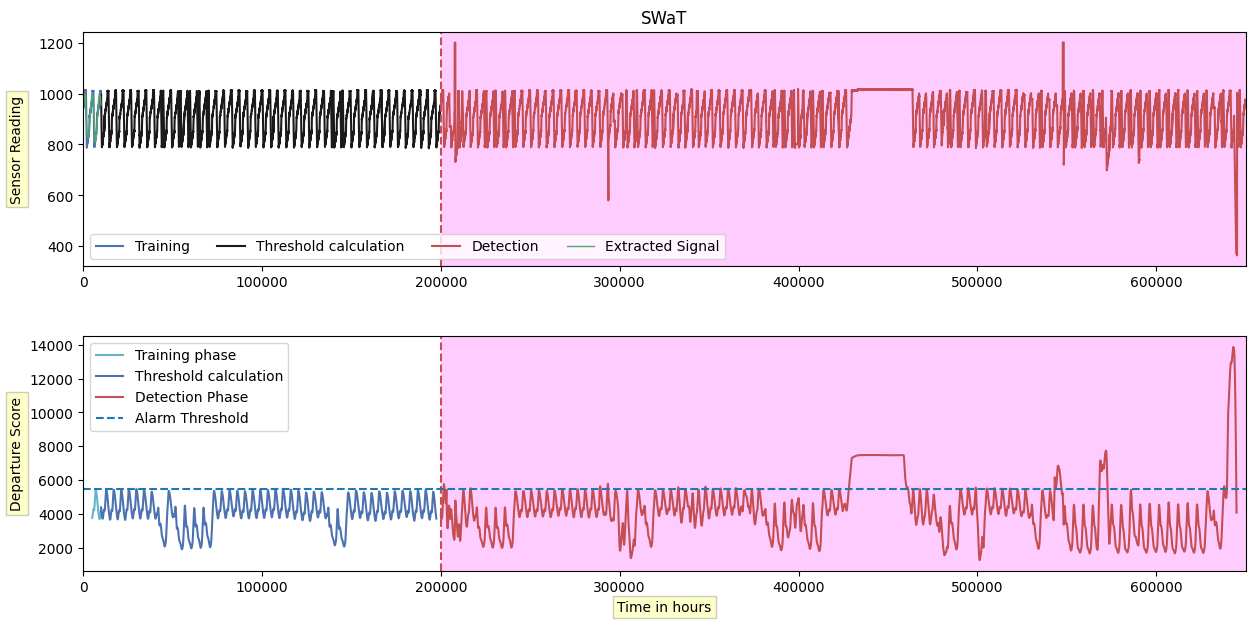

In [54]:
r = elbow_index + 1

# Step 3
centroid, pX, U, X_train_extracted_data = project_onto_signal_subspace(X_train_new, eigenVectors, r)

# Step 4
dtest_theta, dtrain_scores, dtest_scores = find_threshold(X_train_initial, X_train_theta, U, centroid, L)

print(f"Threshold value: {dtest_theta}")

Xj = hankel(X_test[:L], X_test[L-1:])
UT = U.T
pXj = np.matmul(UT, Xj)
dj_matrix = centroid - pXj
dj_scores = np.linalg.norm(dj_matrix, axis=0, ord=2)
dj_scores = np.asarray(dj_scores)
np.max(dj_scores)

plot_stuff(2, X, X_train_extracted_data, dtrain_scores, dtest_scores, dj_scores, dtest_theta, L, "SWaT")

In [55]:
end = time.time()

print(f"Time taken with P = UT is: {end - start:.4f}s")

HTime[HTime_cnt] = end - start
HTime_cnt = HTime_cnt + 1

Time taken with P = UUT is: 358.8856s


# Taking P = UUT

## Scenario DA1

The elbow is at component 4
The value of r: 5
0.041317665754416685


c:\Users\Himanshu Shekhar\Desktop\College\3rd Year\Sem 5\CS658\Assignments\PASAD\Implementation\plot.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(xlables)
c:\Users\Himanshu Shekhar\Desktop\College\3rd Year\Sem 5\CS658\Assignments\PASAD\Implementation\plot.py:52: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(xlables)


(2, 2) (2, 2) (1, 1)
Time taken with P = UUT is: 0.6665s


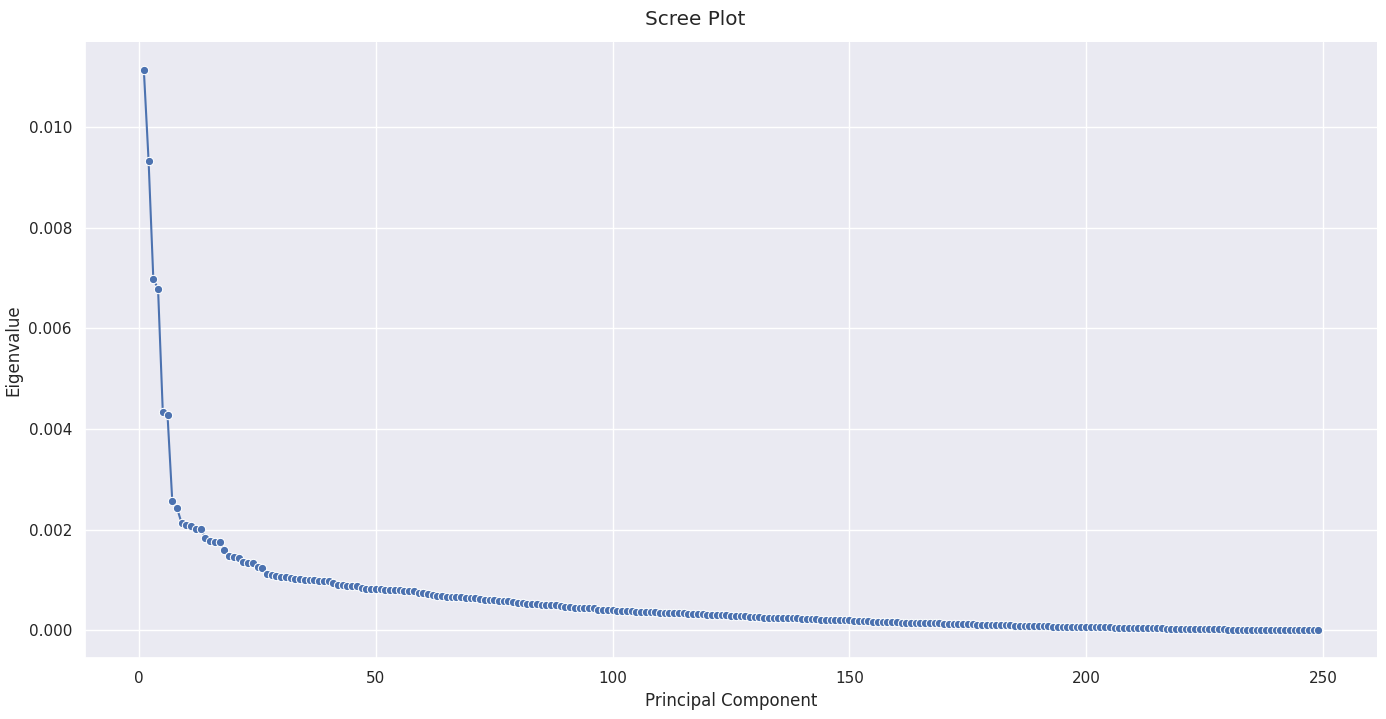

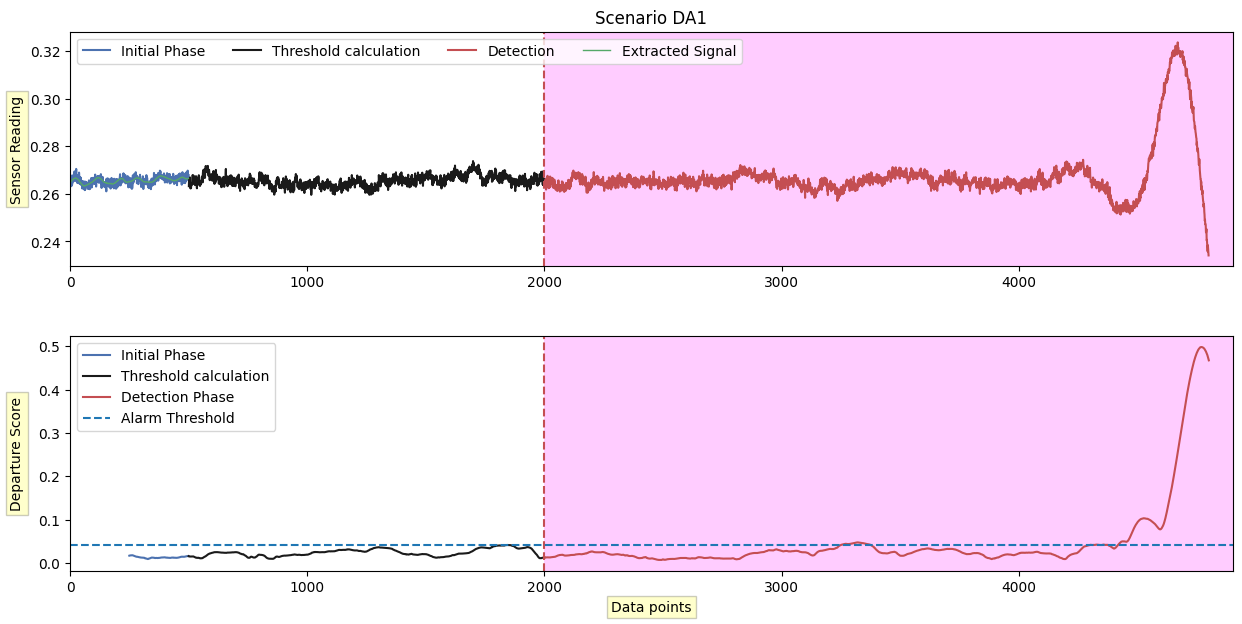

In [56]:
X = np.asarray(pd.read_csv('../Dataset/TE/1-Scenario DA1/xmv10_359_data_1.csv', usecols=[0], header=None))

X_train = X[:2000]
X_test = X[1750:]

X_train_initial = X_train[:500]
X_train_theta = X_train[250:]

start = time.time()

X_train_new, L = create_embedding(X_train_initial)
eigenValues, eigenVectors = find_eig(X_train_new)

temp_df = pd.DataFrame({
    'Principal Component': range(1, len(eigenValues)),
    'Eigenvalue': eigenValues[1:]
})

sns.set_theme()

plot = sns.relplot(data=temp_df, x='Principal Component', y='Eigenvalue', kind='line', marker='o', height=7, aspect=2)

plot.set_axis_labels("Principal Component", "Eigenvalue")
plot.figure.suptitle("Scree Plot", y=1.02)

diff = np.diff(eigenValues[1:])

elbow_index = np.argmin(diff) + 1

print(f"The elbow is at component {elbow_index}")
print(f"The value of r: {elbow_index + 1}")

r = elbow_index + 1

centroid, pX, U, X_train_extracted_data = project_onto_signal_subspace_with_UUT(X_train_new, eigenVectors, r)

dtest_theta, dtrain_scores, dtest_scores = find_threshold_with_UUT(X_train_initial, X_train_theta, U, centroid, L)

print(dtest_theta)

Xj = hankel(X_test[:L], X_test[L-1:])
UT = U.T
pXj = np.matmul(np.matmul(U, UT), Xj)
dj_matrix = centroid - pXj
dj_scores = np.linalg.norm(dj_matrix, axis=0, ord=2)
dj_scores = np.asarray(dj_scores)
np.max(dj_scores)

plot_stuff(1, X, X_train_extracted_data, dtrain_scores, dtest_scores, dj_scores, dtest_theta, L, "Scenario DA1")

end = time.time()

print(f"Time taken with P = UUT is: {end - start:.4f}s")

HTime[HTime_cnt] = end - start
HTime_cnt = HTime_cnt + 1

## SWaT Dataset

In [57]:
X_train = pd.read_excel('../Dataset/SWaT/SWaT_Dataset_Normal_v0.xlsx', usecols=[19], header=None, engine='calamine')
X_test = pd.read_excel('../Dataset/SWaT/SWaT_Dataset_Attack_v0.xlsx', usecols=[19], header=None, engine='calamine')

X_train = X_train.drop(index=0).reset_index(drop=True)
X_test = X_test.drop(index=0).reset_index(drop=True)

X_train = np.asarray(X_train, dtype=np.float32)
X_test = np.asarray(X_test, dtype=np.float32)

X_train_copy = X_train[-200000:]

X_train_initial = X_train_copy[:10000]
X_train_theta = X_train_copy[7500:]

start = time.time()

# Step 1
X_train_new, L = create_embedding(X_train_initial)

# Step 2
eigenValues, eigenVectors = find_eig(X_train_new)

# Scree Plot
temp_df = pd.DataFrame({
    'Principal Component': range(1, 250),
    'Eigenvalue': eigenValues[1:250] # Value of r will not be very big so there is no point in plotting the trailing values
})

sns.set_theme()

plot = sns.relplot(data=temp_df, x='Principal Component', y='Eigenvalue', kind='line', marker='o', height=7, aspect=2)

plot.set_axis_labels("Principal Component", "Eigenvalue")
plot.figure.suptitle("Scree Plot", y=1.02)

X = np.concatenate((X_train_copy, X_test))

print(X)
print(f"Shape of X: {X.shape}")

diff = np.diff(eigenValues[1:500])

elbow_index = np.argmin(diff) + 1

print(f"The elbow is at component {elbow_index}")
print(f"The value of r: {elbow_index + 1}")

r = elbow_index + 1

# Step 3
centroid, pX, U, X_train_extracted_data = project_onto_signal_subspace_with_UUT(X_train_new, eigenVectors, r)

# Step 4
dtest_theta, dtrain_scores, dtest_scores = find_threshold_with_UUT(X_train_initial, X_train_theta, U, centroid, L)

print(f"Threshold value: {dtest_theta}")

Xj = hankel(X_test[:L], X_test[L-1:])
UT = U.T
pXj = np.matmul(np.matmul(U, UT), Xj)
dj_matrix = centroid - pXj
dj_scores = np.linalg.norm(dj_matrix, axis=0, ord=2)
dj_scores = np.asarray(dj_scores)
np.max(dj_scores)

plot_stuff(2, X, X_train_extracted_data, dtrain_scores, dtest_scores, dj_scores, dtest_theta, L, "SWaT")

end = time.time()

print(f"Time taken with P = UUT is: {end - start:.4f}s")

HTime[HTime_cnt] = end - start
HTime_cnt = HTime_cnt + 1

# Runtime Analysis

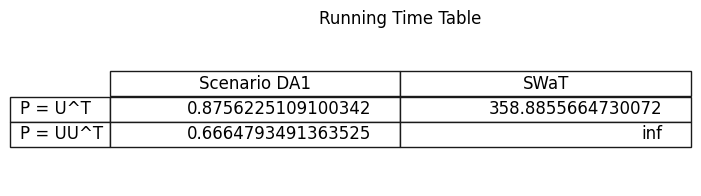

In [68]:
HTime_matrix = HTime.reshape(2,2)

fig, ax = plt.subplots(figsize=(5, 2))

ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_frame_on(False)

column_labels = ['Scenario DA1', 'SWaT']
row_labels = ['P = U^T', 'P = UU^T']

table = ax.table(cellText=HTime_matrix, colLabels=column_labels, rowLabels=row_labels, loc='center')

table.set_fontsize(12)
table.scale(1.5, 1.5)

plt.title('Running Time Table')
plt.show()

# Attack Scenario Analysis

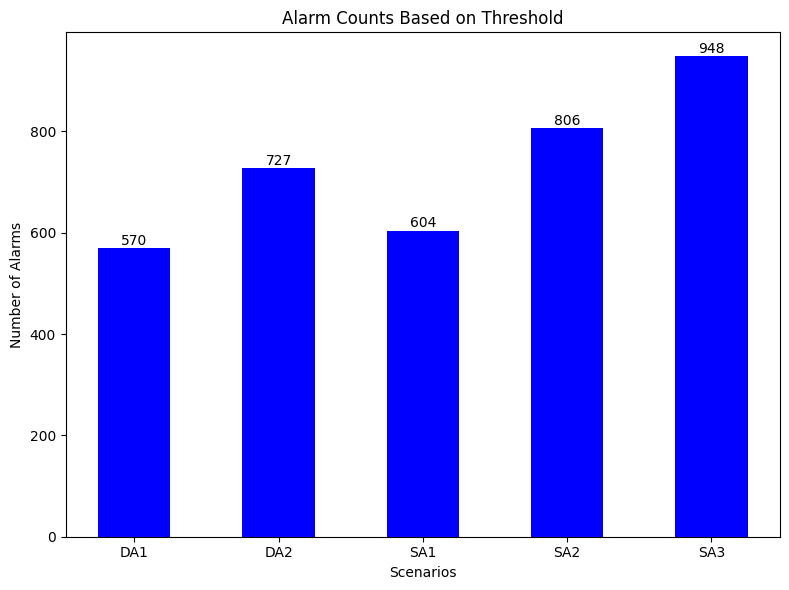

In [58]:
categories = ['DA1', 'DA2', 'SA1', 'SA2', 'SA3']  

bar_width = 0.5

index = np.arange(len(categories))

plt.figure(figsize=(8, 6))
bars = plt.bar(index, alarm_count, bar_width, color='blue')

plt.xlabel('Scenarios')
plt.ylabel('Number of Alarms')
plt.title('Alarm Counts Based on Threshold')
plt.xticks(index, categories)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()